### Lets dive in into this Rappi challenge for Sergio Ehijo. This notebook has the objective to do an EDA of the features.


##### Lets first import a few libraries


In [1]:
import pandas as pd
import numpy as np

##### What we want to do is to see and analyse the variables, to see if there is correlation, or how they behave before putting them in the model. On the other hand, we need to check for nulls and missing values. Let's do it Rappi ! 

In [16]:
# Lets import the csv. 
df = pd.read_csv(r"C:\Users\chech\OneDrive\Documentos\StudyNights\test-rappi-DS\assets\house_sales.csv")
df.head()

,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
0,221900,3,1.00,1180,5650,1.0,0,3,0,1955,0,98178,47.511234,-122.256775,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,3,400,1951,1991,98125,47.721023,-122.318862,1690,7639
2,180000,2,1.00,770,10000,1.0,0,3,0,1933,0,98028,47.737927,-122.233196,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,5,910,1965,0,98136,47.520820,-122.393185,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,3,0,1987,0,98074,47.616812,-122.044901,1800,7503


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18448 entries, 0 to 18447
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     18448 non-null  int64  
 1   num_bed                   18448 non-null  int64  
 2   num_bath                  18448 non-null  float64
 3   size_house                18448 non-null  int64  
 4   size_lot                  18448 non-null  int64  
 5   num_floors                18448 non-null  float64
 6   is_waterfront             18448 non-null  int64  
 7   condition                 18448 non-null  int64  
 8   size_basement             18448 non-null  int64  
 9   year_built                18448 non-null  int64  
 10  renovation_date           18448 non-null  int64  
 11  zip                       18448 non-null  int64  
 12  latitude                  18448 non-null  float64
 13  longitude                 18448 non-null  float64
 14  avg_si

##### As we can see, we have NO categorical features (only floats and ints), and there are no null values in the variables, so we dont have to look or think how to fill those nulls, or whether to keep them, interesting.

In [22]:
#Let's do another test. 
df.isnull().values.any() 

False

### Ok, so we are really sure there are no nans nor nulls in there. 

Lets look now if the variables are correlated with each other and with the target. Im using these two following links as help to make my decision:
https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm
https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features


What we are looking for is a map or an array of values that can tell us if a certain variable is correlated to another one in a positive way (which means if one increases the other one does as well) or in a negative way (which means if one increases the other one decreases). 
As of one of the links (the one of stackexchange), if one variable is highly correlated with other features but also highly correlated with the target, then maybe we should keep it because it could add more value. 
Lets be clear that our target is the price column.

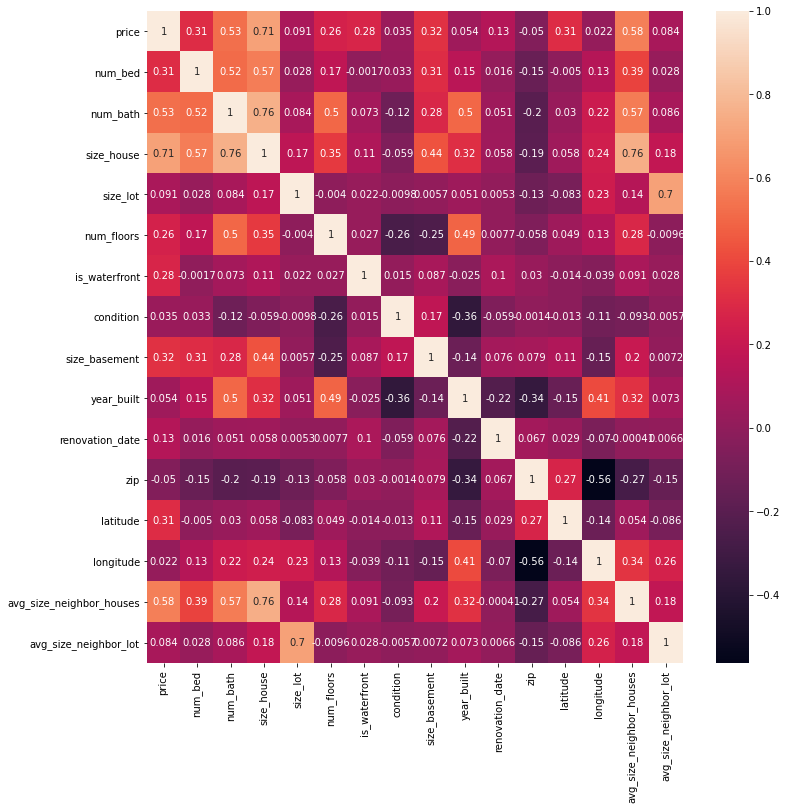

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=12,12
g = sns.heatmap(df.corr(),annot=True)

From this diagram, i would say that the features:
- num_bath
- size_house
- avg_size_neighbor_houses

Are highly correlated with other features, but also have a high correlation with the target. So what i want to do is two models and check if taking them out improves the second model, and of course check as well if the feature importance makes them important ("valga la redundancia") or not, so as we can take a decision whether to take them out or not, improving the speed of calculation and taking less resources for computational time. 

Finally, lets check whether our variables are scaled and centered around zero. We can check some basic indicators with the describe method of pandas.

In [34]:
df.describe()

,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
count,1.844800e+04,18448.000000,18448.000000,18448.000000,1.844800e+04,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000
mean,5.423624e+05,3.372615,2.118888,2083.940915,1.503602e+04,1.494606,0.007643,3.411698,293.571498,1971.001138,85.145002,98077.921455,47.560030,-122.214419,1988.306483,12571.596216
std,3.720135e+05,0.933892,0.772384,921.416218,4.181455e+04,0.540806,0.087092,0.652593,443.607503,29.361619,403.371263,53.497440,0.138557,0.139910,686.173124,26329.260211
min,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,0.000000,1900.000000,0.000000,98001.000000,47.155933,-122.518648,399.000000,651.000000
25%,3.218375e+05,3.000000,1.750000,1430.000000,5.050000e+03,1.000000,0.000000,3.000000,0.000000,1952.000000,0.000000,98033.000000,47.471527,-122.328084,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.600500e+03,1.500000,0.000000,3.000000,0.000000,1975.000000,0.000000,98065.000000,47.571599,-122.230688,1840.000000,7611.000000
75%,6.480000e+05,4.000000,2.500000,2560.000000,1.062525e+04,2.000000,0.000000,4.000000,570.000000,1997.000000,0.000000,98118.000000,47.677918,-122.125733,2370.000000,10050.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777624,-121.315254,6110.000000,858132.000000


Clearly it isnt, except maybe latitude and longitude. But still those two variables should be normalized to be around zero and not 47 and -122, respectively.
We can do that with a method from scikit-learn

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_target = df.price
df = df.drop(['price'], axis = 1)
array_scaled = scaler.fit_transform(df)

The scaler outputs an array, now we want to convert it to a DataFrame


In [43]:
df_scaled = pd.DataFrame(
    array_scaled, columns = df.columns
)

In [44]:
df_scaled.describe()

,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
count,1.844800e+04,1.844800e+04,1.844800e+04,1.844800e+04,1.844800e+04,1.844800e+04,1.844800e+04,1.844800e+04,1.844800e+04,1.844800e+04,1.844800e+04,1.844800e+04,1.844800e+04,1.844800e+04,1.844800e+04
mean,-1.515243e-16,2.162070e-16,-1.523187e-16,1.594892e-16,-1.084137e-14,-4.211918e-16,7.601008e-15,3.892978e-15,-4.344831e-15,4.646441e-16,-8.066888e-14,2.086601e-14,-1.204249e-13,-1.906541e-17,-3.182683e-17
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-3.611450e+00,-2.743383e+00,-1.946991e+00,-3.471619e-01,-9.145977e-01,-8.776088e-02,-3.695664e+00,-6.618000e-01,-2.418227e+00,-2.110892e-01,-1.437892e+00,-2.916540e+00,-2.174514e+00,-2.316252e+00,-4.527632e-01
25%,-3.990021e-01,-4.776098e-01,-7.097321e-01,-2.388234e-01,-9.145977e-01,-8.776088e-02,-6.308819e-01,-6.618000e-01,-6.471596e-01,-2.110892e-01,-8.397163e-01,-6.387656e-01,-8.124366e-01,-7.262307e-01,-2.837831e-01
50%,-3.990021e-01,1.697540e-01,-1.779276e-01,-1.778263e-01,9.973420e-03,-8.776088e-02,-6.308819e-01,-6.618000e-01,1.361972e-01,-2.110892e-01,-2.415406e-01,8.349778e-02,-1.162823e-01,-2.161415e-01,-1.884113e-01
75%,6.718141e-01,4.934359e-01,5.166742e-01,-1.054871e-01,9.345446e-01,-8.776088e-02,9.015091e-01,6.231545e-01,8.854950e-01,-2.110892e-01,7.491878e-01,8.508478e-01,6.338955e-01,5.562792e-01,-9.577423e-02
max,3.172548e+01,7.614438e+00,1.243344e+01,3.913392e+01,3.708258e+00,1.139460e+01,2.433900e+00,1.020396e+01,1.498557e+00,4.784444e+00,2.263320e+00,1.570464e+00,6.426891e+00,6.006946e+00,3.211573e+01


Now, if i was using an MLOps platform or software, however we want to call it, i would love to store this df_scaled dataFrame as an artifact. So i can call it in the other notebook (or class). That leaves me a choice of having to create a class to perform all of the preprocessing and later making the training. Maybe i will do it, but if don't have enough time, for now in the other notebook i will just re-create the same last steps to re-scale the dataframe. Just a heads up. 

For now here it ends the preprocessing notebook. Let's go ahead with our xgboost model